# Canopy

## Initialise Canopy

### Load packages

In [1]:
%matplotlib inline
%load_ext autoreload

import os
import sys
import gdal
import pandas as pd
import numpy as np
import xarray as xr
import datacube
import matplotlib.pyplot as plt

sys.path.append('../../../Scripts')
from dea_dask import create_local_dask_cluster
from dea_plotting import display_map, rgb

sys.path.append('../../modules')
import canopy

sys.path.append('../../shared')
import satfetcher, tools

/env/lib/python3.6/site-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.7.2-CAPI-1.11.0 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


### Set up a dask cluster

In [2]:
# initialise the cluster. paste url into dask panel for more info.
create_local_dask_cluster()

Client Scheduler: tcp://127.0.0.1:39287 Dashboard: /user/lewis/proxy/8787/status,Cluster Workers: 1 Cores: 2 Memory: 13.11 GB


### Show study area for context

In [3]:
# testing study area extent - yandi and roy hill
lat_extent, lon_extent = (-22.63461, -22.33461), (119.88111, 120.18111) # royhill

# display onto interacrive map
display_map(x=lon_extent, y=lat_extent)

## Load and prepare canopy height model raster

### Set raster paths

In [4]:
# get canopy height model raster
rast_path = r'../../data/nicher/roy_lidar/chm_lidar_10m.tif'


### Load raster

In [5]:
# load rasters as individual dataset variables
ds = satfetcher.load_local_rasters(rast_path_list=rast_path, 
                                   use_dask=True, 
                                   conform_nodata_to=-999)

# show data
#ds

Converting rasters to an xarray dataset.
Converted raster to xarray data array: chm_lidar_10m
Rasters converted to dataset successfully.



### Compute raster into memory

In [6]:
# compute dask - we need to make calculations
ds = ds.compute()

### Show a subset of canopy height map

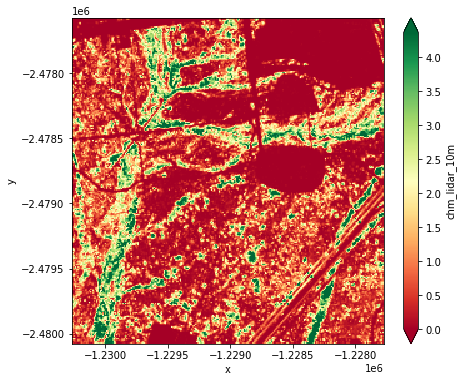

In [7]:
# set a small subset of canopy to investigate
da = ds.isel(x=slice(1000, 1250), y=slice(1000, 1250))

# plot map
fig = plt.figure(figsize=(7, 6))
da['chm_lidar_10m'].plot(robust=True, cmap='RdYlGn')

## Create binary canopy height masks

### Create a binary mask of canopy over 2m tall only

Creating binary mask from canopy height model.
Generating mask of height > 2m.


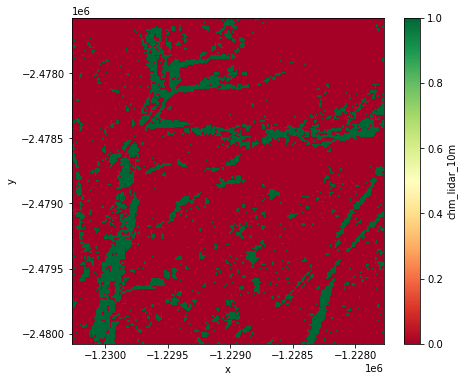

In [8]:
# create binary mask showing canopy height > than 2m
da_over_2m = canopy.binary_mask(da, remove_lt=2)

# plot binary mask
fig = plt.figure(figsize=(7, 6))
da_over_2m['chm_lidar_10m'].plot(robust=True, cmap='RdYlGn')

### Create a binary mask of canopy < 3m tall only

Creating binary mask from canopy height model.
Generating mask of height < 3m.


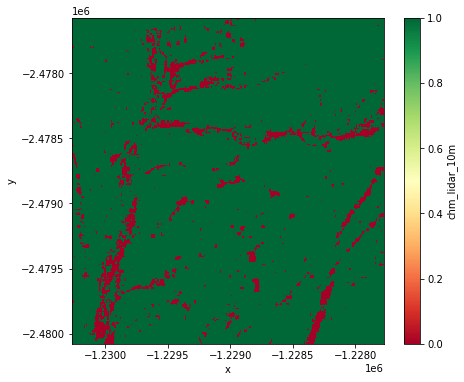

In [9]:
# create binary mask showing canopy height < than 3m
da_under_3m = canopy.binary_mask(da, remove_gt=3)

# plot binary mask
fig = plt.figure(figsize=(7, 6))
da_under_3m['chm_lidar_10m'].plot(robust=True, cmap='RdYlGn')

### Create a binary mask of canopy between 4m and 5m tall

Creating binary mask from canopy height model.
Generating mask of height between 4m and 5m.


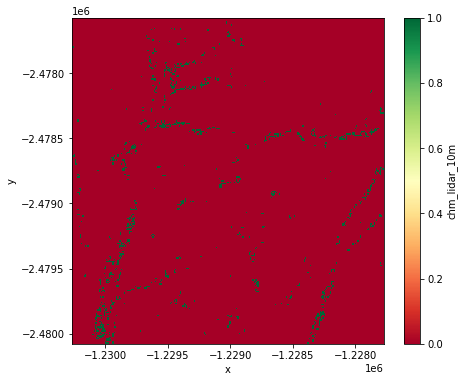

In [10]:
# create binary mask showing canopy heights between 4m and 5m
da_btwn_4m_5m = canopy.binary_mask(da, remove_lt=4, remove_gt=5)

# plot binary mask
fig = plt.figure(figsize=(7, 6))
da_btwn_4m_5m['chm_lidar_10m'].plot(robust=True, cmap='RdYlGn')

## Create fuzzy sigmoidal increasing canopy height mask

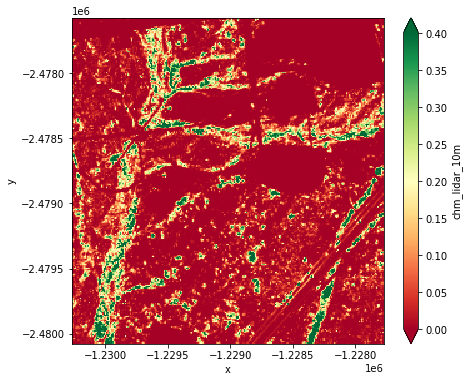

In [11]:
# perform an inc sigmoidal to rescale 0-1, cut off top end
da_inc_sig = canopy.inc_sigmoid(da, a=0, b=10)

# plot sigmoidal mask
fig = plt.figure(figsize=(7, 6))
da_inc_sig['chm_lidar_10m'].plot(robust=True, cmap='RdYlGn')

## Create fuzzy sigmoidal decreasing canopy height mask

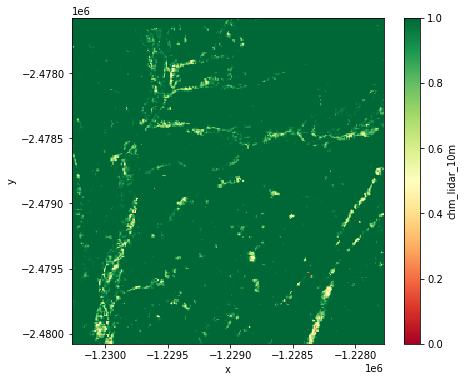

In [12]:
# perform an dec sigmoidal to rescale 0-1, cut off top end
da_dec_sig = canopy.dec_sigmoid(da, c=2, d=10)

# plot sigmoidal mask
fig = plt.figure(figsize=(7, 6))
da_dec_sig['chm_lidar_10m'].plot(robust=False, cmap='RdYlGn')

## Create fuzzy sigmoidal bell curve canopy height mask

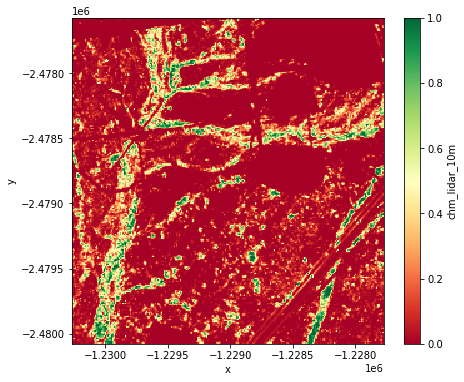

In [24]:
# perform a bell sigmoidal to rescale 0-1
da_bell_sig = canopy.bell_sigmoid(da, a=0, bc=6, d=13)

# plot sigmoidal mask
fig = plt.figure(figsize=(7, 6))
da_bell_sig['chm_lidar_10m'].plot(robust=False, cmap='RdYlGn')